# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_range

(-90, 90)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [4]:
cities

['mar del plata',
 'thompson',
 'qaanaaq',
 'taolanaro',
 'ancud',
 'katherine',
 'rikitea',
 'quebradillas',
 'tasiilaq',
 'jamestown',
 'dikson',
 'lidkoping',
 'kapaa',
 'chokurdakh',
 'barentsburg',
 'vaini',
 'vila velha',
 'cape town',
 'saskylakh',
 'sinnamary',
 'punta arenas',
 'katsuura',
 'salalah',
 'bethel',
 'kalmunai',
 'atuona',
 'saint-georges',
 'treinta y tres',
 'tiksi',
 'ilulissat',
 'tilichiki',
 'besancon',
 'butaritari',
 'cape canaveral',
 'san-pedro',
 'narsaq',
 'mahebourg',
 'san jacinto',
 'aksarka',
 'mataura',
 'kirakira',
 'puerto ayora',
 'the valley',
 'eenhana',
 'jiazi',
 'nikolskoye',
 'lorengau',
 'lompoc',
 'tabou',
 'klyuchi',
 'amderma',
 'tsihombe',
 'nouadhibou',
 'albany',
 'ushuaia',
 'biswan',
 'arlit',
 'santa rosa',
 'lebu',
 'kodiak',
 'najran',
 'ryotsu',
 'busselton',
 'port alfred',
 'tuktoyaktuk',
 'karkaralinsk',
 'barrow',
 'rungata',
 'pokhara',
 'carnarvon',
 'kahului',
 'san patricio',
 'jizan',
 'houma',
 'faya',
 'yankton',
 

In [5]:
lat_lngs

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# Loop through the list of cities and perform a request for data on each
City = []
Latitude = []
Longitude = []
Max_Temp = []
Min_Temp = []
Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        City.append(response['name'])
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Min_Temp.append(response['main']['temp_min'])
        Temp.append(response['main']['temp'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        print(f"Processed data for the city: {city}")
    except:
        print(f"Data for the city: {city} not found")

    
print(f"Data process completed")

Processed data for the city: mar del plata
Processed data for the city: thompson
Processed data for the city: qaanaaq
Data for the city: taolanaro not found
Processed data for the city: ancud
Processed data for the city: katherine
Processed data for the city: rikitea
Processed data for the city: quebradillas
Processed data for the city: tasiilaq
Processed data for the city: jamestown
Processed data for the city: dikson
Processed data for the city: lidkoping
Processed data for the city: kapaa
Processed data for the city: chokurdakh
Data for the city: barentsburg not found
Processed data for the city: vaini
Processed data for the city: vila velha
Processed data for the city: cape town
Processed data for the city: saskylakh
Processed data for the city: sinnamary
Processed data for the city: punta arenas
Processed data for the city: katsuura
Processed data for the city: salalah
Processed data for the city: bethel
Processed data for the city: kalmunai
Processed data for the city: atuona
Pro

Processed data for the city: termoli
Processed data for the city: shieli
Processed data for the city: camacha
Data for the city: daxian not found
Processed data for the city: craig
Processed data for the city: saint-philippe
Processed data for the city: saint anthony
Processed data for the city: vila franca do campo
Processed data for the city: charlottetown
Processed data for the city: vitim
Data for the city: shcholkine not found
Processed data for the city: rizhao
Data for the city: mys shmidta not found
Processed data for the city: penalva
Processed data for the city: georgetown
Processed data for the city: fasa
Processed data for the city: ponta do sol
Data for the city: galiwinku not found
Processed data for the city: filadelfia
Processed data for the city: paamiut
Processed data for the city: ukiah
Processed data for the city: clyde river
Processed data for the city: severo-kurilsk
Processed data for the city: east london
Processed data for the city: mariestad
Processed data for

Processed data for the city: dubuque
Processed data for the city: laguna
Processed data for the city: yichun
Processed data for the city: grand gaube
Data for the city: burkhala not found
Processed data for the city: stolbishche
Processed data for the city: ambilobe
Processed data for the city: peniche
Processed data for the city: tommot
Processed data for the city: winneba
Data for the city: formoso do araguaia not found
Processed data for the city: el alto
Processed data for the city: ballina
Data for the city: aporawan not found
Processed data for the city: jaora
Processed data for the city: batagay-alyta
Processed data for the city: kaeo
Processed data for the city: dafeng
Processed data for the city: vung tau
Processed data for the city: soloneshnoye
Processed data for the city: mitsamiouli
Processed data for the city: arman
Processed data for the city: petropavlovsk-kamchatskiy
Data for the city: umzimvubu not found
Processed data for the city: urubamba
Processed data for the cit

In [8]:
len(City)

555

In [51]:
weather_dict = {
    "City": City,
    "Latitude": Latitude,
    "Longitude": Longitude,
    "Max Temp": Max_Temp,
    "Min Temp": Min_Temp,
    "Temp": Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Max Temp,Min Temp,Temp,Humidity,Cloudiness,Wind Speed,Country
0,Mar del Plata,-38.0023,-57.5575,27.13,21.60,22.49,86,76,7.15,AR
1,Thompson,55.7435,-97.8558,-14.35,-14.35,-14.35,95,73,2.50,CA
2,Qaanaaq,77.4840,-69.3632,-26.19,-26.19,-26.19,93,100,2.23,GL
3,Ancud,-41.8697,-73.8203,15.63,15.63,15.63,82,100,2.09,CL
4,Katherine,-14.4667,132.2667,28.18,28.18,28.18,65,40,4.63,AU
...,...,...,...,...,...,...,...,...,...,...
550,Nishifukuma,33.7667,130.4667,9.00,5.72,7.89,50,12,5.88,JP
551,Noumea,-22.2763,166.4572,27.78,24.99,27.78,99,100,2.19,NC
552,Talara,-4.5772,-81.2719,22.42,22.42,22.42,68,0,9.77,PE
553,Hinganghāt,20.5667,78.8333,19.98,19.98,19.98,21,0,3.30,IN


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
#Exporting the data into csv
weather_data.to_csv('weather_data.csv', encoding='utf-8')

In [53]:
#Displaying the dataframe
weather_data.head()

,City,Latitude,Longitude,Max Temp,Min Temp,Temp,Humidity,Cloudiness,Wind Speed,Country
0,Mar del Plata,-38.0023,-57.5575,27.13,21.60,22.49,86,76,7.15,AR
1,Thompson,55.7435,-97.8558,-14.35,-14.35,-14.35,95,73,2.50,CA
2,Qaanaaq,77.4840,-69.3632,-26.19,-26.19,-26.19,93,100,2.23,GL
3,Ancud,-41.8697,-73.8203,15.63,15.63,15.63,82,100,2.09,CL
4,Katherine,-14.4667,132.2667,28.18,28.18,28.18,65,40,4.63,AU


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [54]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = weather_data.loc[weather_data['Humidity']> 100]
humidity_over_100

,City,Latitude,Longitude,Max Temp,Min Temp,Temp,Humidity,Cloudiness,Wind Speed,Country


In [55]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
index_names = weather_data[ weather_data['Humidity'] > 100 ].index
clean_weather_data = weather_data.drop(index_names, inplace = False)
clean_weather_data

,City,Latitude,Longitude,Max Temp,Min Temp,Temp,Humidity,Cloudiness,Wind Speed,Country
0,Mar del Plata,-38.0023,-57.5575,27.13,21.60,22.49,86,76,7.15,AR
1,Thompson,55.7435,-97.8558,-14.35,-14.35,-14.35,95,73,2.50,CA
2,Qaanaaq,77.4840,-69.3632,-26.19,-26.19,-26.19,93,100,2.23,GL
3,Ancud,-41.8697,-73.8203,15.63,15.63,15.63,82,100,2.09,CL
4,Katherine,-14.4667,132.2667,28.18,28.18,28.18,65,40,4.63,AU
...,...,...,...,...,...,...,...,...,...,...
550,Nishifukuma,33.7667,130.4667,9.00,5.72,7.89,50,12,5.88,JP
551,Noumea,-22.2763,166.4572,27.78,24.99,27.78,99,100,2.19,NC
552,Talara,-4.5772,-81.2719,22.42,22.42,22.42,68,0,9.77,PE
553,Hinganghāt,20.5667,78.8333,19.98,19.98,19.98,21,0,3.30,IN


In [56]:
clean_weather_data.dtypes

City           object
Latitude      float64
Longitude     float64
Max Temp      float64
Min Temp      float64
Temp          float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
dtype: object

## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [57]:
Latitude=clean_weather_data['Latitude']
Max_Temp=clean_weather_data['Max Temp']
time=pd.to_datetime('today').strftime('%d/%m/%y')

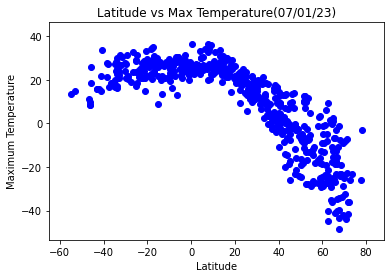

In [58]:
plt.scatter(Latitude,Max_Temp,facecolor='blue')
plt.title('Latitude vs Max Temperature('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.xlim(min(Latitude)-10,max(Latitude)+10)
plt.ylim(min(Max_Temp)-5,max(Max_Temp)+10)


plt.savefig('Output Data/LatitudevsMaxTemp.png',encoding='utf-8');

In [59]:
Latitude=clean_weather_data['Latitude']
Min_Temp=clean_weather_data['Min Temp']
time=pd.to_datetime('today').strftime('%d/%m/%y')

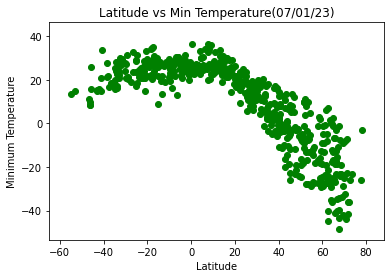

In [60]:
plt.scatter(Latitude,Min_Temp,facecolor='green')
plt.title('Latitude vs Min Temperature('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Minimum Temperature')
plt.xlim(min(Latitude)-10,max(Latitude)+10)
plt.ylim(min(Min_Temp)-5,max(Min_Temp)+10)


plt.savefig('Output Data/LatitudevsMinTemp.png',encoding='utf-8');

In [61]:
Latitude=clean_weather_data['Latitude']
Temp=clean_weather_data['Temp']
time=pd.to_datetime('today').strftime('%d/%m/%y')

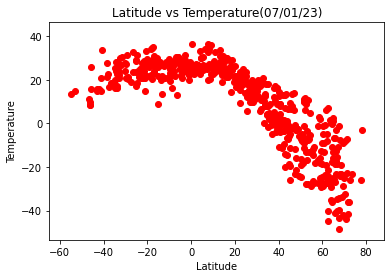

In [62]:
plt.scatter(Latitude,Temp,facecolor='red')
plt.title('Latitude vs Temperature('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.xlim(min(Latitude)-10,max(Latitude)+10)
plt.ylim(min(Temp)-5,max(Temp)+10)


plt.savefig('Output Data/LatitudevsTemp.png',encoding='utf-8');

## Latitude vs. Humidity Plot

In [63]:
Latitude=clean_weather_data['Latitude']
Humidity=clean_weather_data['Humidity']
time=pd.to_datetime('today').strftime('%d/%m/%y')

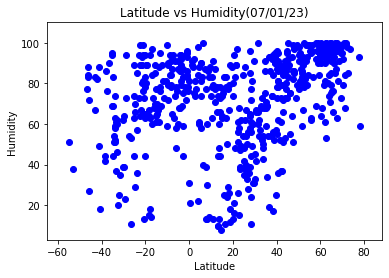

In [64]:
plt.scatter(Latitude,Humidity,facecolor='blue')
plt.title('Latitude vs Humidity('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(min(Latitude)-10,max(Latitude)+10)
plt.ylim(min(Humidity)-5,max(Humidity)+10)


plt.savefig('Output Data/LatitudevsHumidity.png',encoding='utf-8');

## Latitude vs. Cloudiness Plot

In [65]:
Latitude=clean_weather_data['Latitude']
Cloudiness=clean_weather_data['Cloudiness']
time=pd.to_datetime('today').strftime('%d/%m/%y')

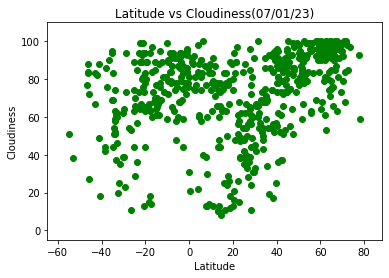

In [66]:
plt.scatter(Latitude,Humidity,facecolor='green')
plt.title('Latitude vs Cloudiness('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(min(Latitude)-10,max(Latitude)+10)
plt.ylim(min(Cloudiness)-5,max(Cloudiness)+10)


plt.savefig('Output Data/LatitudevsCloudiness.png',encoding='utf-8');

## Latitude vs. Wind Speed Plot

In [67]:
Latitude=clean_weather_data['Latitude']
Wind_Speed=clean_weather_data['Wind Speed']
time=pd.to_datetime('today').strftime('%d/%m/%y')

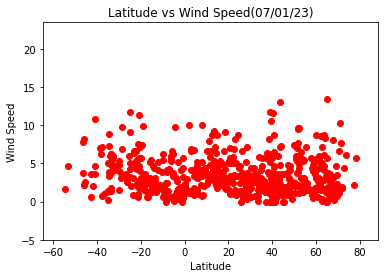

In [68]:
plt.scatter(Latitude,Wind_Speed,facecolor='red')
plt.title('Latitude vs Wind Speed('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.xlim(min(Latitude)-10,max(Latitude)+10)
plt.ylim(min(Wind_Speed)-5,max(Wind_Speed)+10)


plt.savefig('Output Data/LatitudevsWindSpeed.png',encoding='utf-8');

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [69]:
#Northern Hemisphere
north_hemi_data = clean_weather_data[clean_weather_data['Latitude'] >= 0]
north_hemi_data

,City,Latitude,Longitude,Max Temp,Min Temp,Temp,Humidity,Cloudiness,Wind Speed,Country
1,Thompson,55.7435,-97.8558,-14.35,-14.35,-14.35,95,73,2.50,CA
2,Qaanaaq,77.4840,-69.3632,-26.19,-26.19,-26.19,93,100,2.23,GL
6,Quebradillas,18.4738,-66.9385,26.09,22.62,24.69,89,22,1.79,PR
7,Tasiilaq,65.6145,-37.6368,-6.91,-6.91,-6.91,66,92,3.76,GL
8,Jamestown,42.0970,-79.2353,1.77,-0.59,0.21,61,97,2.68,US
...,...,...,...,...,...,...,...,...,...,...
546,Wagar,16.1525,36.2032,29.92,29.92,29.92,25,4,4.94,SD
548,Umba,66.6871,34.3429,-18.65,-18.65,-18.65,98,43,2.40,RU
550,Nishifukuma,33.7667,130.4667,9.00,5.72,7.89,50,12,5.88,JP
553,Hinganghāt,20.5667,78.8333,19.98,19.98,19.98,21,0,3.30,IN


In [70]:
north_Latitude=north_hemi_data['Latitude']
Max_Temp_North=north_hemi_data['Max Temp']
time=pd.to_datetime('today').strftime('%d/%m/%y')

(-53.45, 46.4)

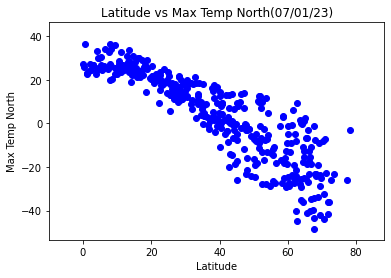

In [71]:
plt.scatter(north_Latitude,Max_Temp_North,facecolor='blue')
plt.title('Latitude vs Max Temp North('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Max Temp North')
plt.xlim(min(north_Latitude)-10,max(north_Latitude)+10)
plt.ylim(min(Max_Temp_North)-5,max(Max_Temp_North)+10)

In [72]:
# Perform a linear regression on maxtemperature vs. latitude in the northern hemisphere
(slope_north, intercept_north, rvalue_north, pvalue_north, stderr_north) = stats.linregress(north_Latitude, Max_Temp_North)

# Get regression values
regress_values_north = north_Latitude * slope_north + intercept_north
print(regress_values_north)

1     -10.870393
2     -29.433570
6      20.952429
7     -19.298769
8       0.781704
         ...    
546    22.934476
548   -20.214611
550     7.894550
553    19.165401
554    27.308591
Name: Latitude, Length: 383, dtype: float64


In [73]:
# Create line equation string
line_eq_north = "y = " + str(round(slope_north,2)) + "x +" + str(round(intercept_north,2))
print(line_eq_north)

y = -0.85x +36.73


The r-value is: 0.7761734607090803


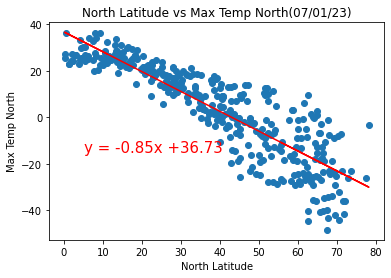

In [74]:
# Create Plot
plt.scatter(north_Latitude,Max_Temp_North)
plt.plot(north_Latitude,regress_values_north,"r-")

# Label plot and annotate the line equation
plt.xlabel('North Latitude')
plt.ylabel('Max Temp North')
plt.annotate(line_eq_north,(5,-15),fontsize=15,color="red")
time=pd.to_datetime('today').strftime('%d/%m/%y')
plt.title('North Latitude vs Max Temp North('+time+')')
plt.savefig('Output Data/NorthLatitudevsMaxTempNorth.png',encoding='utf-8')

# Print r value
print(f"The r-value is: {rvalue_north**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [75]:
#Southern Hemisphere
south_hemi_data = clean_weather_data[clean_weather_data['Latitude'] <= 0]
south_hemi_data

,City,Latitude,Longitude,Max Temp,Min Temp,Temp,Humidity,Cloudiness,Wind Speed,Country
0,Mar del Plata,-38.0023,-57.5575,27.13,21.60,22.49,86,76,7.15,AR
3,Ancud,-41.8697,-73.8203,15.63,15.63,15.63,82,100,2.09,CL
4,Katherine,-14.4667,132.2667,28.18,28.18,28.18,65,40,4.63,AU
5,Rikitea,-23.1203,-134.9692,25.53,25.53,25.53,73,15,6.36,PF
13,Vaini,-21.2000,-175.2000,26.86,26.86,26.86,81,95,7.52,TO
...,...,...,...,...,...,...,...,...,...,...
544,Chui,-33.6971,-53.4616,25.08,25.08,25.08,52,0,4.93,UY
547,Nhulunbuy,-12.2333,136.7667,26.34,26.34,26.34,89,100,5.14,AU
549,Soe,-9.8607,124.2840,19.59,19.59,19.59,90,100,1.48,ID
551,Noumea,-22.2763,166.4572,27.78,24.99,27.78,99,100,2.19,NC


In [76]:
south_Latitude=south_hemi_data['Latitude']
Max_Temp_South=south_hemi_data['Max Temp']
time=pd.to_datetime('today').strftime('%d/%m/%y')

(3.5600000000000005, 45.03)

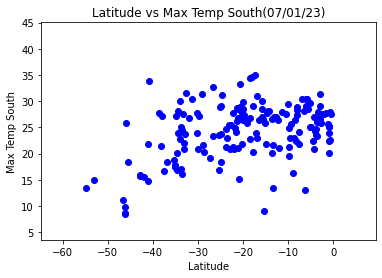

In [77]:
plt.scatter(south_Latitude,Max_Temp_South,facecolor='blue')
plt.title('Latitude vs Max Temp South('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Max Temp South')
plt.xlim(min(south_Latitude)-10,max(south_Latitude)+10)
plt.ylim(min(Max_Temp_South)-5,max(Max_Temp_South)+10)

In [78]:
# Perform a linear regression on maxtemperature vs. latitude in the southern hemisphere
(slope_south, intercept_south, rvalue_south, pvalue_south, stderr_south) = stats.linregress(south_Latitude, Max_Temp_South)

# Get regression values
regress_values_south = south_Latitude * slope_south + intercept_south
print(regress_values_south)

0      21.533002
3      20.933511
4      25.181284
5      23.839879
13     24.137547
         ...    
544    22.200356
547    25.527486
549    25.895265
551    23.970708
552    26.714267
Name: Latitude, Length: 172, dtype: float64


In [79]:
# Create line equation string
line_eq_south = "y = " + str(round(slope_south,2)) + "x +" + str(round(intercept_south,2))
print(line_eq_south)

y = 0.16x +27.42


The r-value is: 0.15015910258249596


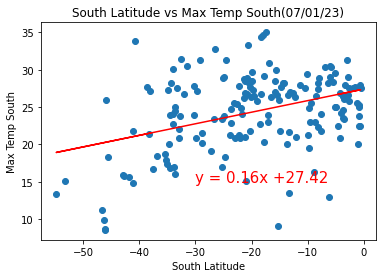

In [80]:
# Create Plot
plt.scatter(south_Latitude,Max_Temp_South)
plt.plot(south_Latitude,regress_values_south,"r-")

# Label plot and annotate the line equation
plt.xlabel('South Latitude')
plt.ylabel('Max Temp South')
plt.annotate(line_eq_south,(-30,15),fontsize=15,color="red")
time=pd.to_datetime('today').strftime('%d/%m/%y')
plt.title('South Latitude vs Max Temp South('+time+')')
plt.savefig('Output Data/SouthLatitudevsMaxTempSouth.png',encoding='utf-8')

# Print r value
print(f"The r-value is: {rvalue_south**2}")

# Show plot
plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [81]:
Humidity_North=north_hemi_data['Humidity']

In [82]:
# Perform a linear regression on humidity vs. latitude in the northern hemisphere
(slope_north_humid, intercept_north_humid, rvalue_north_humid, pvalue_north_humid, stderr_north_humid) = stats.linregress(north_Latitude, Humidity_North)

# Get regression values
regress_values_north_humid = north_Latitude * slope_north_humid + intercept_north_humid
print(regress_values_north_humid)

1      82.963454
2      95.421994
6      61.605802
7      88.620097
8      75.143236
         ...    
546    60.275565
548    89.234758
550    70.369501
553    62.805152
554    57.339910
Name: Latitude, Length: 383, dtype: float64


In [83]:
# Create line equation string
line_eq_north_humid = "y = " + str(round(slope_north_humid,2)) + "x +" + str(round(intercept_north_humid,2))
print(line_eq_north_humid)

y = 0.57x +51.02


The r-value is: 0.2416739183050529


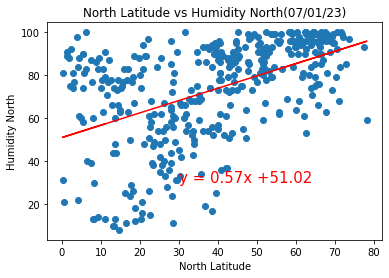

In [84]:
# Create Plot
plt.scatter(north_Latitude,Humidity_North)
plt.plot(north_Latitude,regress_values_north_humid,"r-")

# Label plot and annotate the line equation
plt.xlabel('North Latitude')
plt.ylabel('Humidity North')
plt.annotate(line_eq_north_humid,(30,30),fontsize=15,color="red")
time=pd.to_datetime('today').strftime('%d/%m/%y')
plt.title('North Latitude vs Humidity North('+time+')')
plt.savefig('Output Data/NorthLatitudevsHumidityNorth.png',encoding='utf-8')

# Print r value
print(f"The r-value is: {rvalue_north_humid**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [85]:
Humidity_South=south_hemi_data['Humidity']

In [86]:
# Perform a linear regression on humidity vs. latitude in the northern hemisphere
(slope_south_humid, intercept_south_humid, rvalue_south_humid, pvalue_south_humid, stderr_south_humid) = stats.linregress(south_Latitude, Humidity_South)

# Get regression values
regress_values_south_humid = south_Latitude * slope_south_humid + intercept_south_humid
print(regress_values_south_humid)

0      60.464995
3      58.355284
4      73.303937
5      68.583299
13     69.630844
         ...    
544    62.813532
547    74.522283
549    75.816564
551    69.043710
552    78.698774
Name: Latitude, Length: 172, dtype: float64


In [87]:
# Create line equation string
line_eq_south_humid = "y = " + str(round(slope_south_humid,2)) + "x +" + str(round(intercept_south_humid,2))
print(line_eq_south_humid)

y = 0.55x +81.2


The r-value is: 0.12126943613174643


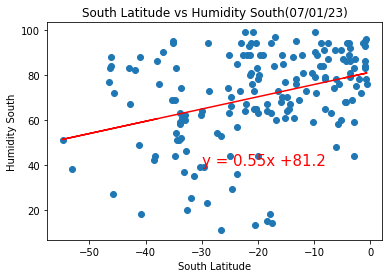

In [88]:
# Create Plot
plt.scatter(south_Latitude,Humidity_South)
plt.plot(south_Latitude,regress_values_south_humid,"r-")

# Label plot and annotate the line equation
plt.xlabel('South Latitude')
plt.ylabel('Humidity South')
plt.annotate(line_eq_south_humid,(-30,40),fontsize=15,color="red")
time=pd.to_datetime('today').strftime('%d/%m/%y')
plt.title('South Latitude vs Humidity South('+time+')')
plt.savefig('Output Data/SouthLatitudevsHumiditySouth.png',encoding='utf-8')

# Print r value
print(f"The r-value is: {rvalue_south_humid**2}")

# Show plot
plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      71.552881
2      88.178959
6      43.050826
7      79.101743
8      61.116701
         ...    
546    41.275609
548    79.922015
550    54.746093
553    44.651374
554    37.357940
Name: Latitude, Length: 383, dtype: float64
y = 0.76x +28.92
The r-value is: 0.133024759630794


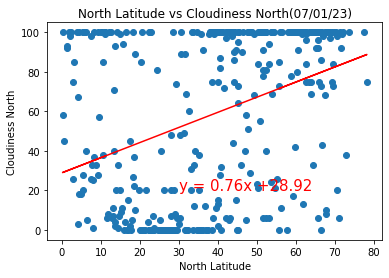

In [89]:
Cloudiness_North=north_hemi_data['Cloudiness']
# Perform a linear regression on cloudiness vs. latitude in the northern hemisphere
(slope_north_cloud, intercept_north_cloud, rvalue_north_cloud, pvalue_north_cloud, stderr_north_cloud) = stats.linregress(north_Latitude, Cloudiness_North)

# Get regression values
regress_values_north_cloud = north_Latitude * slope_north_cloud + intercept_north_cloud
print(regress_values_north_cloud)

# Create line equation string
line_eq_north_cloud = "y = " + str(round(slope_north_cloud,2)) + "x +" + str(round(intercept_north_cloud,2))
print(line_eq_north_cloud)

# Create Plot
plt.scatter(north_Latitude,Cloudiness_North)
plt.plot(north_Latitude,regress_values_north_cloud,"r-")

# Label plot and annotate the line equation
plt.xlabel('North Latitude')
plt.ylabel('Cloudiness North')
plt.annotate(line_eq_north_cloud,(30,20),fontsize=15,color="red")
time=pd.to_datetime('today').strftime('%d/%m/%y')
plt.title('North Latitude vs Cloudiness North('+time+')')
plt.savefig('Output Data/NorthLatitudevsCloudinessNorth.png',encoding='utf-8')

# Print r value
print(f"The r-value is: {rvalue_north_cloud**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      34.044402
3      28.656807
4      66.831358
5      54.776207
13     57.451337
         ...    
544    40.041887
547    69.942661
549    73.247880
551    55.951966
552    80.608215
Name: Latitude, Length: 172, dtype: float64
y = 1.39x +86.98
The r-value is: 0.19174786431302773


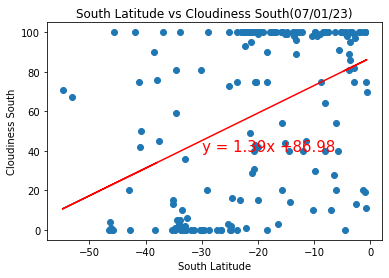

In [90]:
Cloudiness_South=south_hemi_data['Cloudiness']
# Perform a linear regression on cloudiness vs. latitude in the southern hemisphere
(slope_south_cloud, intercept_south_cloud, rvalue_south_cloud, pvalue_south_cloud, stderr_south_cloud) = stats.linregress(south_Latitude, Cloudiness_South)

# Get regression values
regress_values_south_cloud = south_Latitude * slope_south_cloud + intercept_south_cloud
print(regress_values_south_cloud)

# Create line equation string
line_eq_south_cloud = "y = " + str(round(slope_south_cloud,2)) + "x +" + str(round(intercept_south_cloud,2))
print(line_eq_south_cloud)

# Create Plot
plt.scatter(south_Latitude,Cloudiness_South)
plt.plot(south_Latitude,regress_values_south_cloud,"r-")

# Label plot and annotate the line equation
plt.xlabel('South Latitude')
plt.ylabel('Cloudiness South')
plt.annotate(line_eq_south_cloud,(-30,40),fontsize=15,color="red")
time=pd.to_datetime('today').strftime('%d/%m/%y')
plt.title('South Latitude vs Cloudiness South('+time+')')
plt.savefig('Output Data/SouthLatitudevsCloudinessSouth.png',encoding='utf-8')

# Print r value
print(f"The r-value is: {rvalue_south_cloud**2}")

# Show plot
plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1      3.323603
2      3.161393
6      3.601680
7      3.249954
8      3.425423
         ...   
546    3.619000
548    3.241951
550    3.487577
553    3.586064
554    3.657222
Name: Latitude, Length: 383, dtype: float64
y = -0.01x +3.74
The r-value is: 0.0037755513619242486


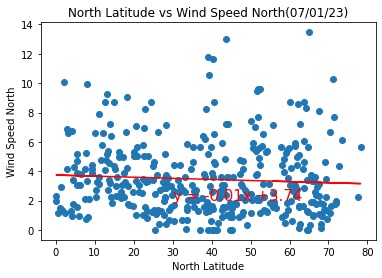

In [91]:
Wind_North=north_hemi_data['Wind Speed']
# Perform a linear regression on Wind Speed vs. latitude in the northern hemisphere
(slope_north_wind, intercept_north_wind, rvalue_north_wind, pvalue_north_wind, stderr_north_wind) = stats.linregress(north_Latitude, Wind_North)

# Get regression values
regress_values_north_wind = north_Latitude * slope_north_wind + intercept_north_wind
print(regress_values_north_wind)

# Create line equation string
line_eq_north_wind = "y = " + str(round(slope_north_wind,2)) + "x +" + str(round(intercept_north_wind,2))
print(line_eq_north_wind)

# Create Plot
plt.scatter(north_Latitude,Wind_North)
plt.plot(north_Latitude,regress_values_north_wind,"r-")

# Label plot and annotate the line equation
plt.xlabel('North Latitude')
plt.ylabel('Wind Speed North')
plt.annotate(line_eq_north_wind,(30,2),fontsize=15,color="red")
time=pd.to_datetime('today').strftime('%d/%m/%y')
plt.title('North Latitude vs Wind Speed North('+time+')')
plt.savefig('Output Data/NorthLatitudevsWindSpeedNorth.png',encoding='utf-8')

# Print r value
print(f"The r-value is: {rvalue_north_wind**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      4.617755
3      4.830727
4      3.321688
5      3.798228
13     3.692480
         ...   
544    4.380675
547    3.198699
549    3.068043
551    3.751750
552    2.777090
Name: Latitude, Length: 172, dtype: float64
y = -0.06x +2.53
The r-value is: 0.08305952485323151


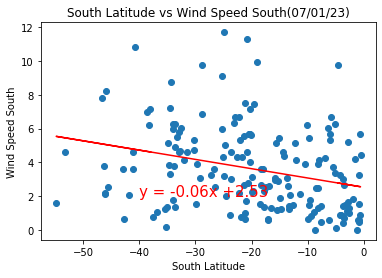

In [92]:
Wind_South=south_hemi_data['Wind Speed']
# Perform a linear regression on Wind Speed vs. latitude in the southern hemisphere
(slope_south_wind, intercept_south_wind, rvalue_south_wind, pvalue_south_wind, stderr_south_wind) = stats.linregress(south_Latitude, Wind_South)

# Get regression values
regress_values_south_wind = south_Latitude * slope_south_wind + intercept_south_wind
print(regress_values_south_wind)

# Create line equation string
line_eq_south_wind = "y = " + str(round(slope_south_wind,2)) + "x +" + str(round(intercept_south_wind,2))
print(line_eq_south_wind)

# Create Plot
plt.scatter(south_Latitude,Wind_South)
plt.plot(south_Latitude,regress_values_south_wind,"r-")

# Label plot and annotate the line equation
plt.xlabel('South Latitude')
plt.ylabel('Wind Speed South')
plt.annotate(line_eq_south_wind,(-40,2),fontsize=15,color="red")
time=pd.to_datetime('today').strftime('%d/%m/%y')
plt.title('South Latitude vs Wind Speed South('+time+')')
plt.savefig('Output Data/SouthLatitudevsWindSpeedSouth.png',encoding='utf-8')

# Print r value
print(f"The r-value is: {rvalue_south_wind**2}")

# Show plot
plt.show()